In [4]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [5]:
#enter the username, password & dbname
engine = create_engine('postgresql://<username>:<password>@localhost:5432/<dbname>')
connection = engine.connect()

In [6]:
df = pd.read_sql_query("SELECT * FROM titles",con=engine)
df

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [7]:
salary=pd.read_sql_query("Select * from salaries", con=engine)
salary

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [8]:
bins = [20000, 40000, 60000, 80000, 100000, 120000, 140000]
group_labels = ["<=40", "40k to 60k", "60k to 80K", "80k to 100k", "100k to 120k", ">=120k"]

In [9]:
pd.cut(salary["salary"], bins, labels=group_labels).head()

0    60k to 80K
1    60k to 80K
2    40k to 60k
3    40k to 60k
4    60k to 80K
Name: salary, dtype: category
Categories (6, object): ['<=40' < '40k to 60k' < '60k to 80K' < '80k to 100k' < '100k to 120k' < '>=120k']

In [10]:
salary["salary range"]=pd.cut(salary["salary"], bins, labels=group_labels)
salary.head()

,emp_no,salary,salary range
0,10001,60117,60k to 80K
1,10002,65828,60k to 80K
2,10003,40006,40k to 60k
3,10004,40054,40k to 60k
4,10005,78228,60k to 80K


In [11]:
salary.head()

,emp_no,salary,salary range
0,10001,60117,60k to 80K
1,10002,65828,60k to 80K
2,10003,40006,40k to 60k
3,10004,40054,40k to 60k
4,10005,78228,60k to 80K


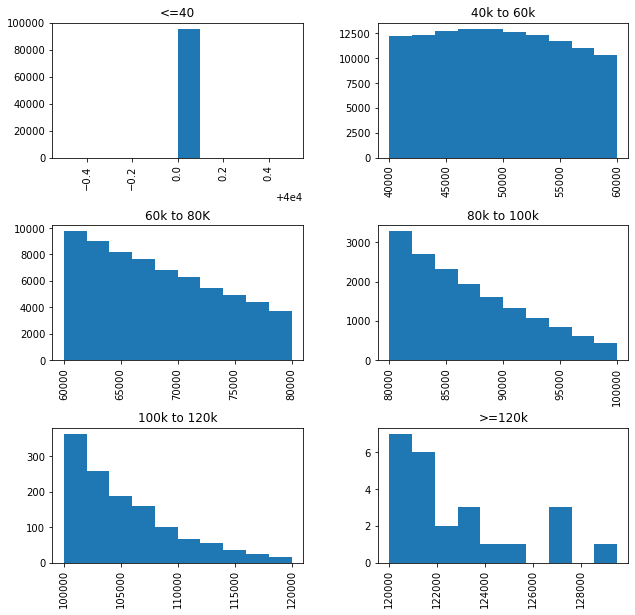

In [12]:
fig=salary.hist(by='salary range', column='salary', figsize=[10, 10])

In [ ]:
# Based on the above figures, most common salary ranges for employees falls between 40k-60k

In [15]:
#Query for this is in postgresql and saved as salary_title.csv file
salary_title=pd.read_csv('Resources/salary_title.csv')

In [16]:
salary_title

,title,avg_salary
0,Senior Engineer,48506.80
1,Engineer,48535.34
2,Assistant Engineer,48564.43
3,Technique Leader,48582.90
4,Manager,51531.04
5,Staff,58465.38
6,Senior Staff,58550.17


<AxesSubplot:title={'center':'Avg salary per title'}, xlabel='title'>

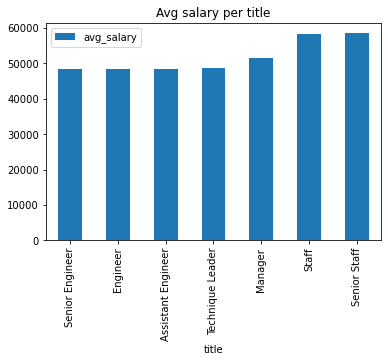

In [17]:
salary_title.plot.bar(x="title", y="avg_salary", rot=90, title ='Avg salary per title')